1. Evaluating Logistic Regression with Cross-Validation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
url = '/content/titanic.csv.csv'
data = pd.read_csv(url)

# Preprocessing
data = data.dropna(subset=['Age', 'Embarked', 'Fare'])
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']


In [2]:
# Train-test split evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
train_test_accuracy = accuracy_score(y_test, y_pred)

# Cross-validation evaluation
cross_val_accuracies = cross_val_score(log_reg, X, y, cv=5)

print(f"Train-test split accuracy: {train_test_accuracy}")
print(f"Cross-validation accuracies: {cross_val_accuracies}")
print(f"Cross-validation mean accuracy: {cross_val_accuracies.mean()}")


Train-test split accuracy: 0.7972027972027972
Cross-validation accuracies: [0.75524476 0.82517483 0.77464789 0.76760563 0.81690141]
Cross-validation mean accuracy: 0.787914901999409


2. Analyzing Overfitting and Underfitting in Decision Trees

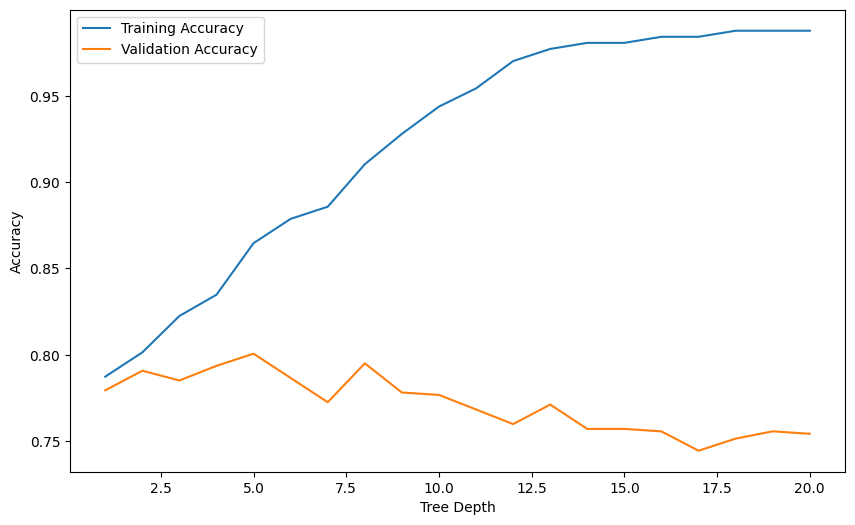

In [3]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_accuracies = []
validation_accuracies = []

depths = range(1, 21)
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, tree.predict(X_train))
    val_acc = cross_val_score(tree, X, y, cv=5).mean()

    train_accuracies.append(train_acc)
    validation_accuracies.append(val_acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


3. Calculating Precision, Recall, and F1-Score for Logistic Regression

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.8541666666666666
Recall: 0.6507936507936508
F1-Score: 0.7387387387387387


4. ROC Curve Analysis for Decision Trees

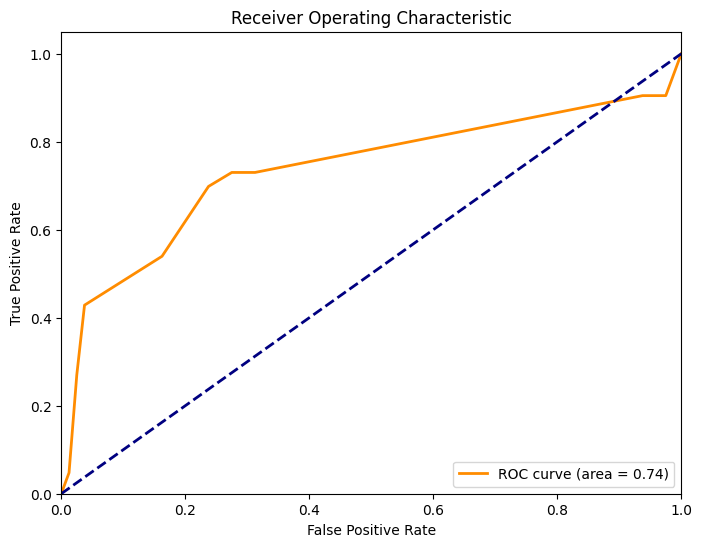

In [5]:
from sklearn.metrics import roc_curve, auc

# Train a decision tree classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_proba = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


5. Comparing Model Performance with and without Cross-Validation

In [6]:
# Logistic Regression
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=5)
log_reg_cv_mean = log_reg_cv_scores.mean()

# Decision Tree
tree_cv_scores = cross_val_score(tree, X, y, cv=5)
tree_cv_mean = tree_cv_scores.mean()

print(f"Logistic Regression CV Mean Accuracy: {log_reg_cv_mean}")
print(f"Decision Tree CV Mean Accuracy: {tree_cv_mean}")

# Print precision, recall, and F1-score for decision tree
tree_y_pred = tree.predict(X_test)
tree_precision = precision_score(y_test, tree_y_pred)
tree_recall = recall_score(y_test, tree_y_pred)
tree_f1 = f1_score(y_test, tree_y_pred)

print(f"Decision Tree Precision: {tree_precision}")
print(f"Decision Tree Recall: {tree_recall}")
print(f"Decision Tree F1-Score: {tree_f1}")


Logistic Regression CV Mean Accuracy: 0.787914901999409
Decision Tree CV Mean Accuracy: 0.7935979513444302
Decision Tree Precision: 0.723404255319149
Decision Tree Recall: 0.5396825396825397
Decision Tree F1-Score: 0.6181818181818182
